# Sales Forecasting and Business Insights for a Retail Store

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## Load Datasets

In [2]:
train = pd.read_csv(r"C:\Users\hp\Downloads\train.csv")
features = pd.read_csv(r"C:\Users\hp\Downloads\features.csv")
stores = pd.read_csv(r"C:\Users\hp\Downloads\stores.csv")

In [3]:
df = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")

In [4]:
df = df.merge(stores, on="Store", how="left")

In [5]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB
None


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,150681.0,7246.420196,0.27,2240.27,5347.45,9210.9,88646.76,8291.221345
MarkDown2,111248.0,3334.628621,-265.76,41.6,192.0,1926.94,104519.54,9475.357325
MarkDown3,137091.0,1439.421384,-29.1,5.08,24.6,103.99,141630.61,9623.07829
MarkDown4,134967.0,3383.168256,0.22,504.22,1481.31,3595.04,67474.85,6292.384031


In [9]:
df.shape

(421570, 16)

In [10]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [11]:
(df.isnull().sum() * 100)/ df.shape[0]

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [12]:
df = df.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"])

In [13]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [14]:
numeric_column=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']   

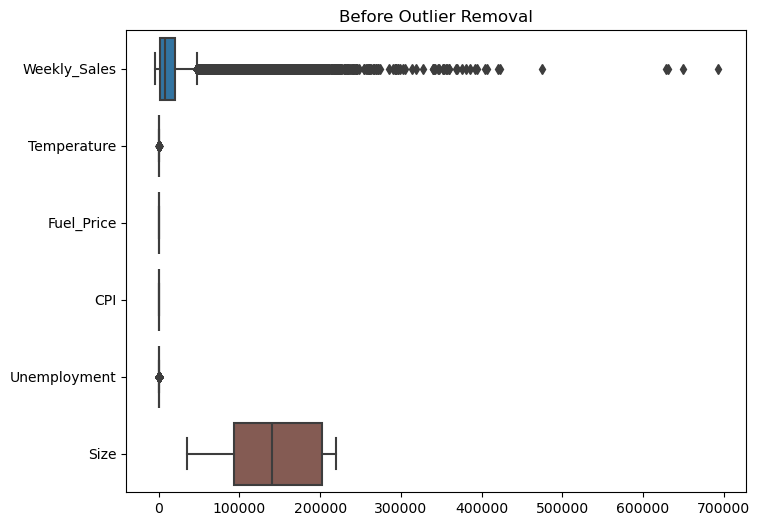

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[numeric_column], orient='h')
plt.title("Before Outlier Removal")
plt.show()

In [16]:
for col in numeric_column:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col]=np.where(df[col] > upper, upper, df[col])
    df[col]=np.where(df[col]< lower, lower, df[col])

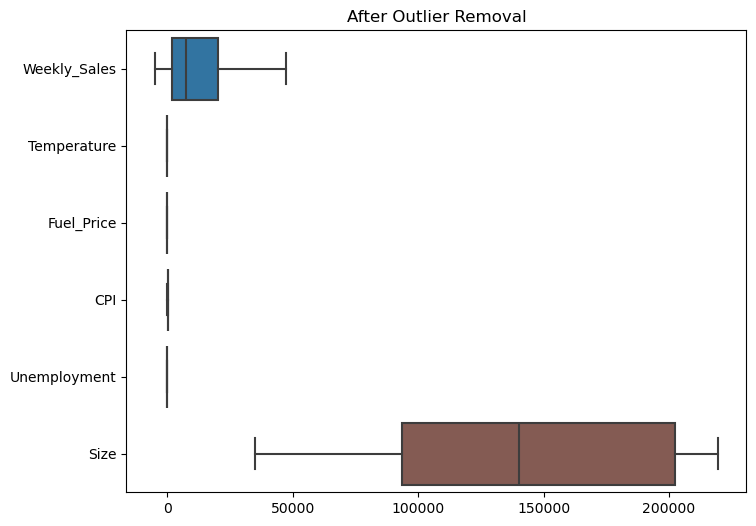

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[numeric_column], orient='h')
plt.title("After Outlier Removal")
plt.show()

## Exploratory Data Analysis (EDA)

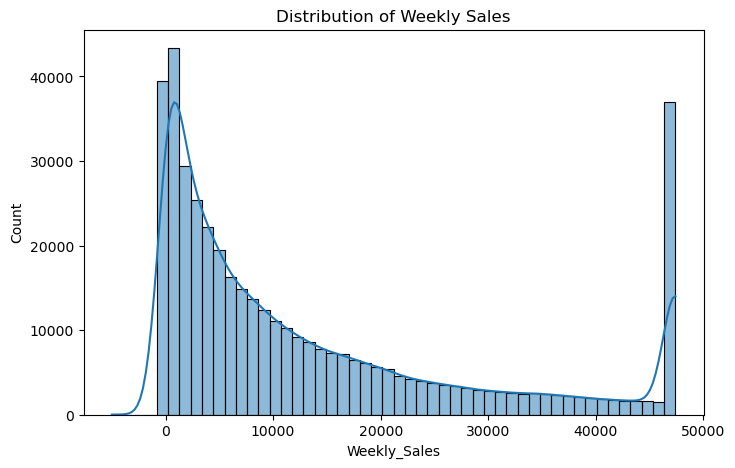

In [18]:
# Distribution of Weekly Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

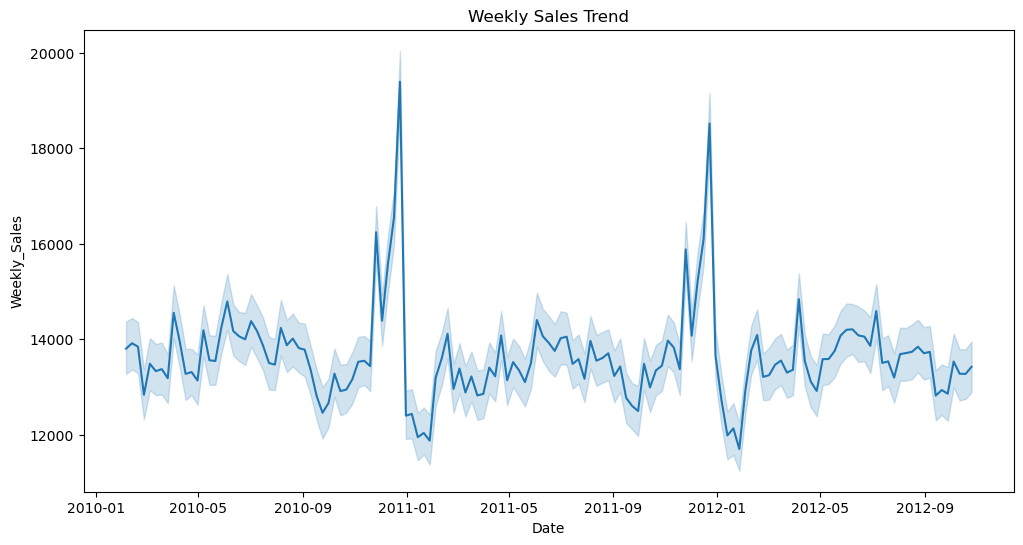

In [19]:
# Sales Trend Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Weekly_Sales", data=df)
plt.title("Weekly Sales Trend")
plt.show()

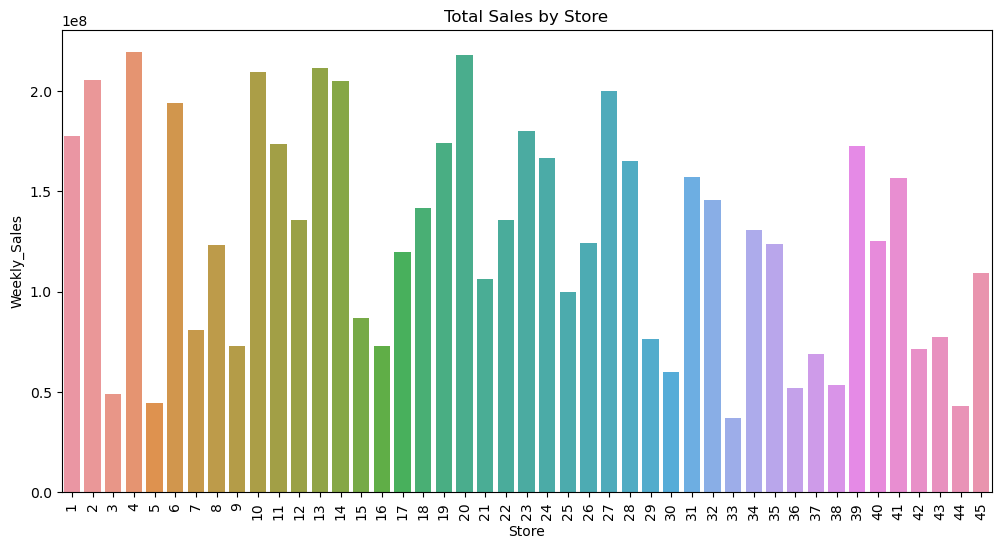

In [20]:
# Sales by Store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title("Total Sales by Store")
plt.xticks(rotation=90)
plt.show()

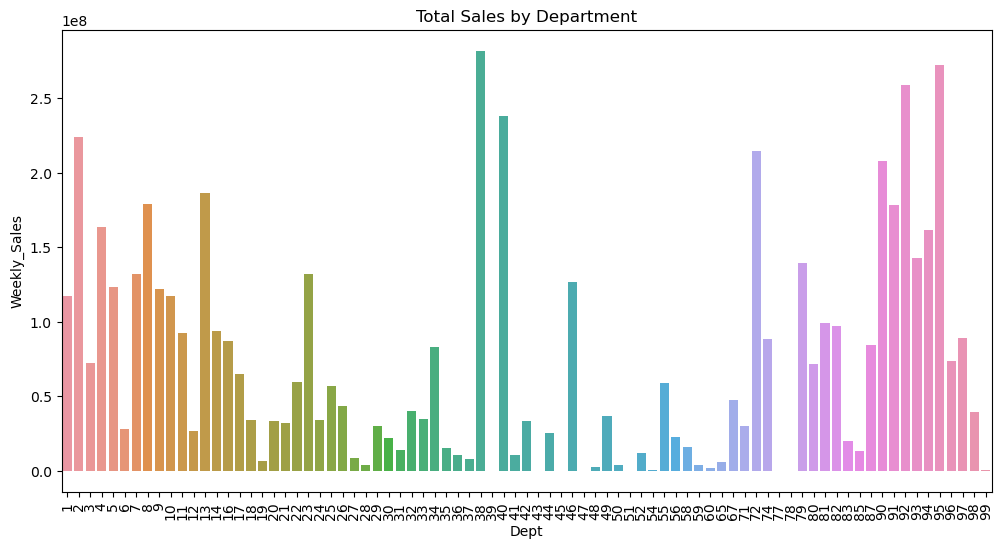

In [21]:
# Sales by Department
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Dept', y='Weekly_Sales', data=dept_sales)
plt.title("Total Sales by Department")
plt.xticks(rotation=90)
plt.show()

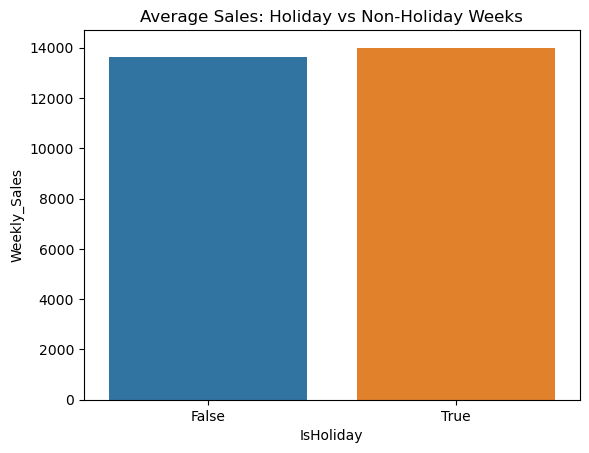

In [22]:
# Holiday vs Non-Holiday Sales
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales)
plt.title("Average Sales: Holiday vs Non-Holiday Weeks")
plt.show()

In [23]:
numeric_df = df.select_dtypes(include=[np.number])

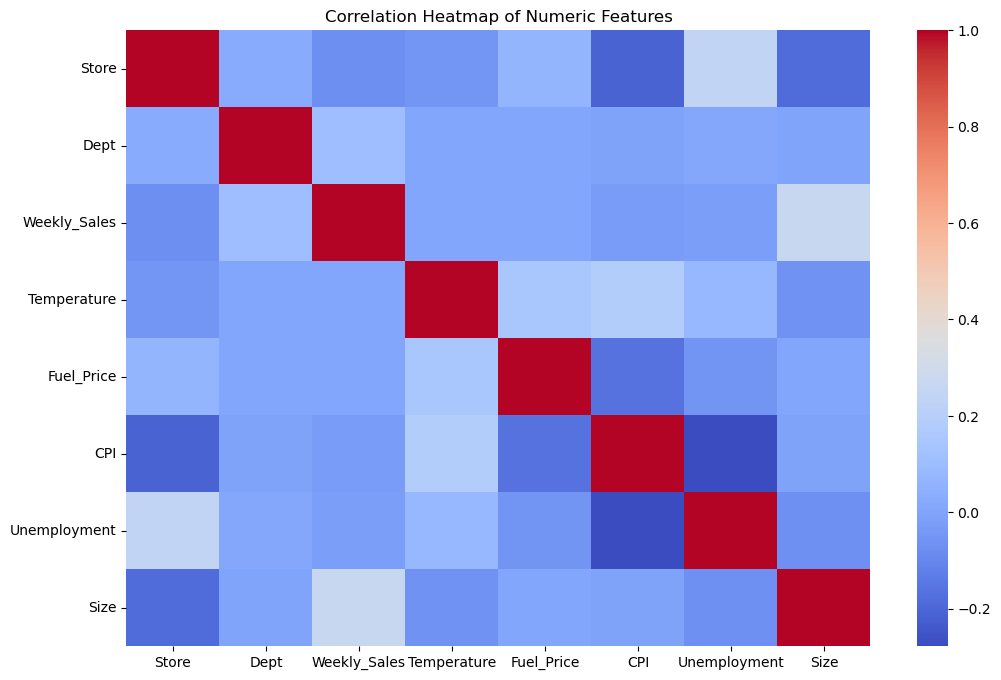

In [24]:
# Check relationships between numeric features.
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [25]:
df["Year"] = df['Date'].dt.year
df["Month"] = df['Date'].dt.month


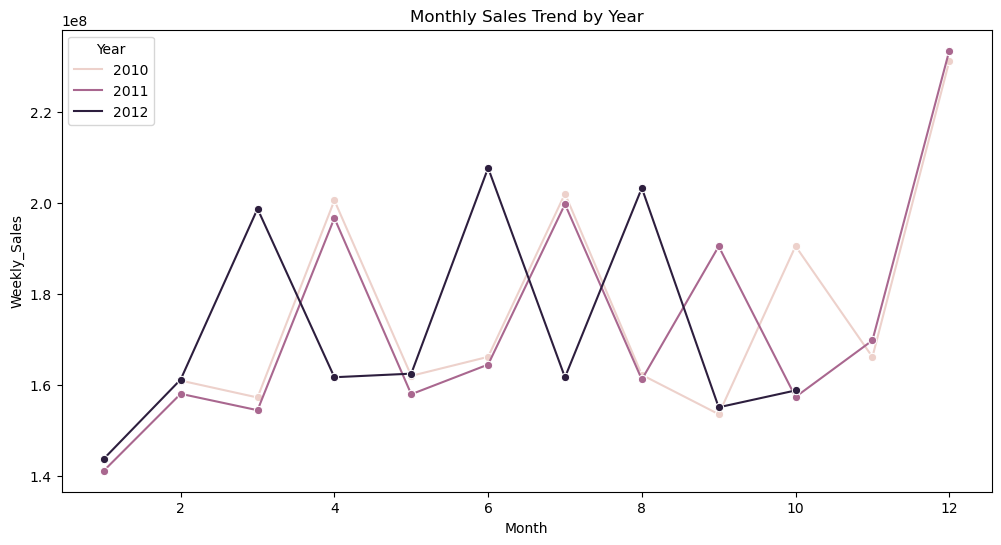

In [26]:
# Weekly Sales by Year & Month
monthly_sales = df.groupby(["Year","Month"])["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="Weekly_Sales", hue="Year", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend by Year")
plt.show()

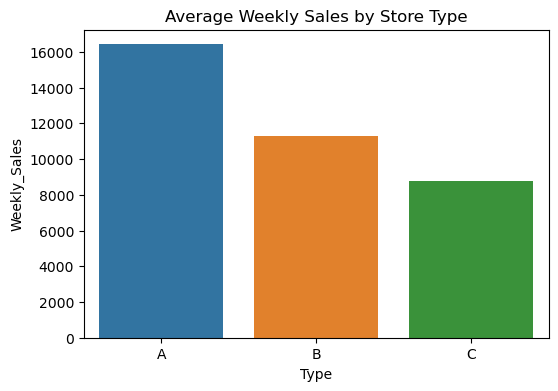

In [27]:
# Analyze impact of store types (A, B, C)
type_sales = df.groupby("Type")["Weekly_Sales"].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x="Type", y="Weekly_Sales", data=type_sales)
plt.title("Average Weekly Sales by Store Type")
plt.show()


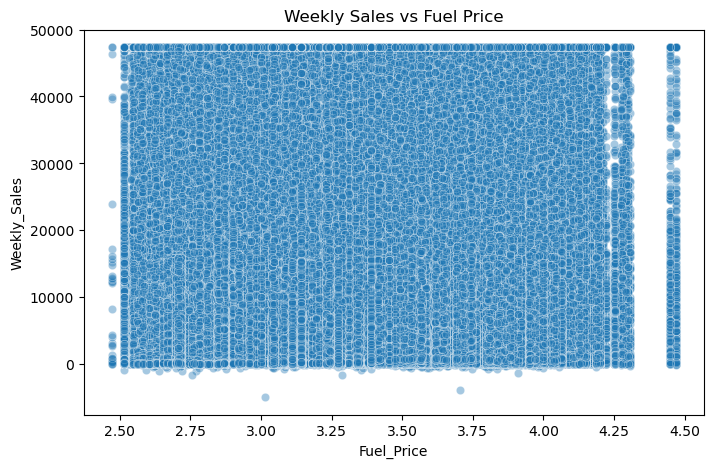

In [28]:
# Effect of Fuel Price on Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=df, alpha=0.4)
plt.title("Weekly Sales vs Fuel Price")
plt.show()

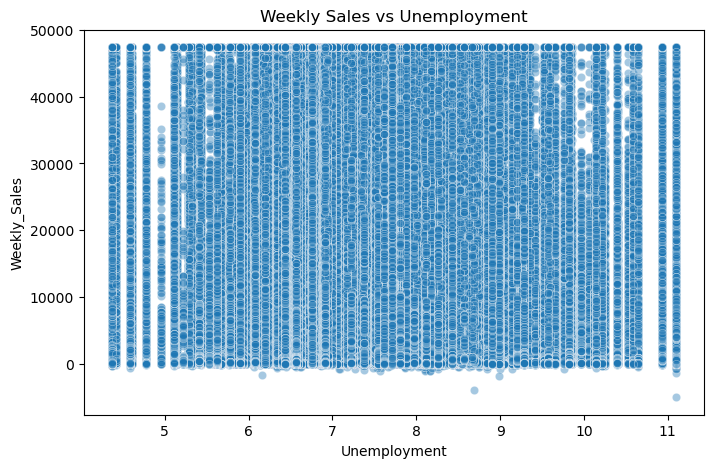

In [29]:
# Effect of Unemployment on Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=df, alpha=0.4)
plt.title("Weekly Sales vs Unemployment")
plt.show()

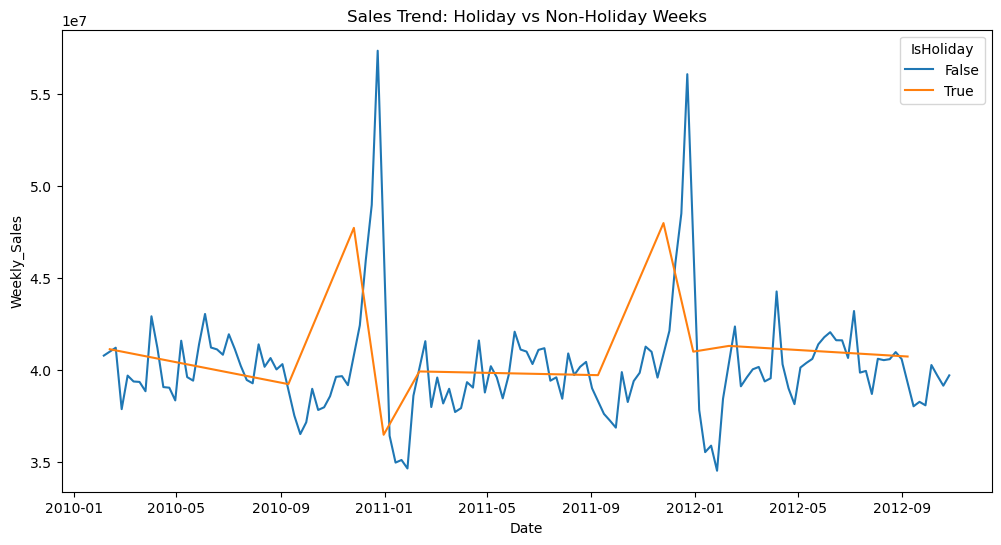

In [30]:
# Holiday Weeks Trend
holiday_trend = df.groupby(["Date","IsHoliday"])["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Weekly_Sales", hue="IsHoliday", data=holiday_trend)
plt.title("Sales Trend: Holiday vs Non-Holiday Weeks")
plt.show()


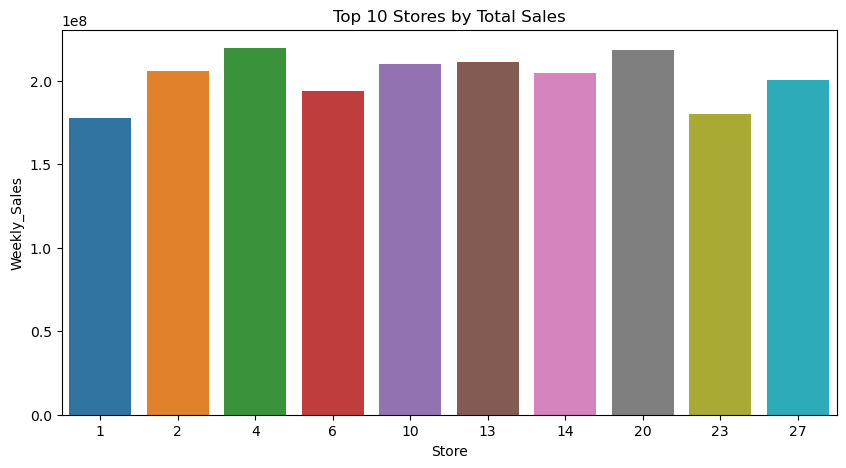

In [31]:
# Top 10 Stores Contribution to Sales
top_stores = store_sales.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x="Store", y="Weekly_Sales", data=top_stores)
plt.title("Top 10 Stores by Total Sales")
plt.show()

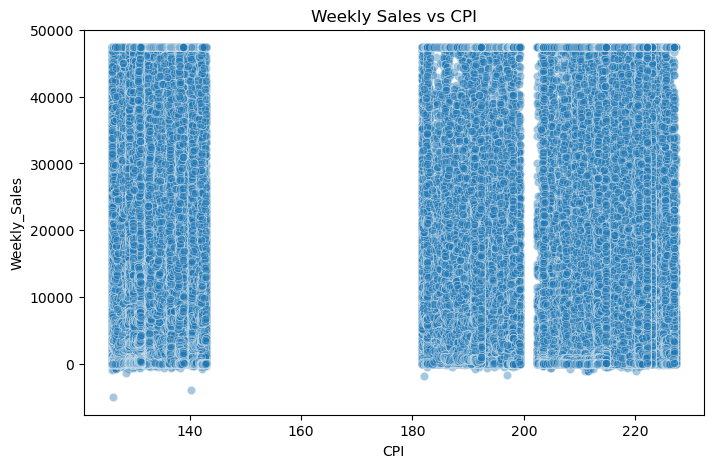

In [32]:
# CPI Impact on Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="CPI", y="Weekly_Sales", data=df, alpha=0.4)
plt.title("Weekly Sales vs CPI")
plt.show()

## Feature Engineering

In [33]:
df = df.sort_values(["Store","Dept","Date"])
df["Year"] = df['Date'].dt.year
df["Month"] = df['Date'].dt.month
df["Lag1"] = df.groupby(["Store","Dept"])["Weekly_Sales"].shift(1)
df["Lag2"] = df.groupby(["Store","Dept"])["Weekly_Sales"].shift(2)
df["RollingMean3"] = df.groupby(["Store","Dept"])["Weekly_Sales"].shift(1).rolling(window=3).mean()
df = df.dropna()

In [34]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Lag1,Lag2,RollingMean3
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315.0,2010,2,41595.55,46039.49,37519.846667
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315.0,2010,3,19403.54,41595.55,35679.526667


In [35]:
en_data=df[['Type']]

In [36]:
ohe=OneHotEncoder(drop='first')

In [37]:
arr=ohe.fit_transform(en_data).toarray()

In [38]:
df2=pd.DataFrame(arr,columns=['Type_B','Type_C'])

In [39]:
df=pd.concat([df,df2], axis=1)

In [40]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Lag1,Lag2,RollingMean3,Type_B,Type_C
3,1.0,1.0,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315.0,2010.0,2.0,41595.55,46039.49,37519.846667,0.0,0.0
4,1.0,1.0,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315.0,2010.0,3.0,19403.54,41595.55,35679.526667,0.0,0.0


In [41]:
le=LabelEncoder()
le.fit(df['IsHoliday'])

LabelEncoder()

In [42]:
df['IsHoliday']=le.transform(df['IsHoliday'])

In [43]:
df.drop(['Type'],axis=1, inplace=True)

In [44]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Lag1,Lag2,RollingMean3,Type_B,Type_C
3,1.0,1.0,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315.0,2010.0,2.0,41595.55,46039.49,37519.846667,0.0,0.0
4,1.0,1.0,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315.0,2010.0,3.0,19403.54,41595.55,35679.526667,0.0,0.0


In [45]:
df = df.dropna()

In [46]:
features_list = ["Store","Dept","IsHoliday","Temperature","Fuel_Price","CPI","Unemployment",
                 "Size","Year","Month","Lag1","Lag2","RollingMean3","Type_B","Type_C" ]

In [47]:
X = df[features_list]
y = df["Weekly_Sales"]

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

## Models

## Linear Regression:

In [50]:

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred_lr = lr.predict(X_test)

In [52]:
(lr.score(X_test,y_test)) * 100

97.42595917855543

In [53]:
print("R2 Score:", r2_score(y_test, y_pred_lr))

R2 Score: 0.9742595917855543


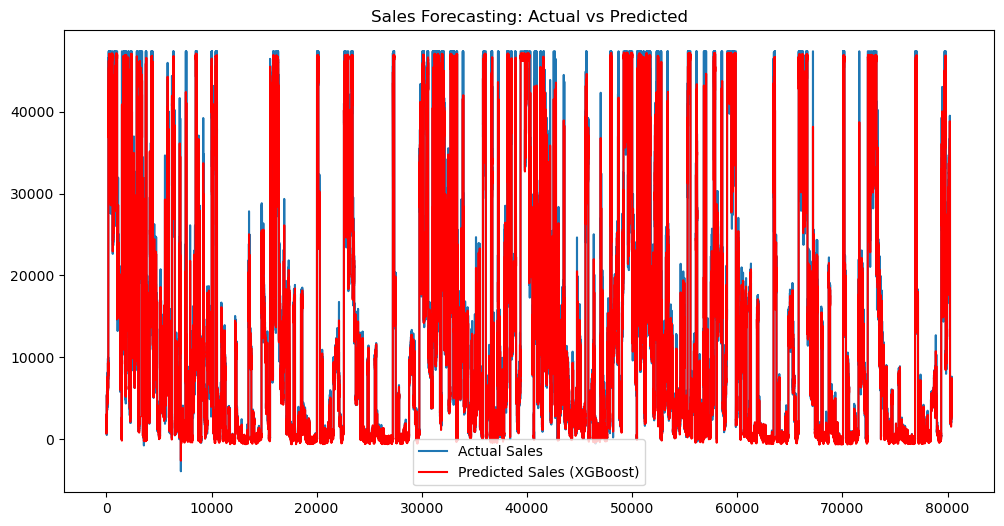

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred_lr, label="Predicted Sales (XGBoost)", color="red")
plt.legend()
plt.title("Sales Forecasting: Actual vs Predicted")
plt.show()

## Random Forest:

In [55]:

rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
y_pred_rf = rf.predict(X_test)

In [57]:
(rf.score(X_test,y_test)) * 100

98.02819892588774

In [58]:
print("R2 Score:", r2_score(y_test, y_pred_rf))

R2 Score: 0.9802819892588773


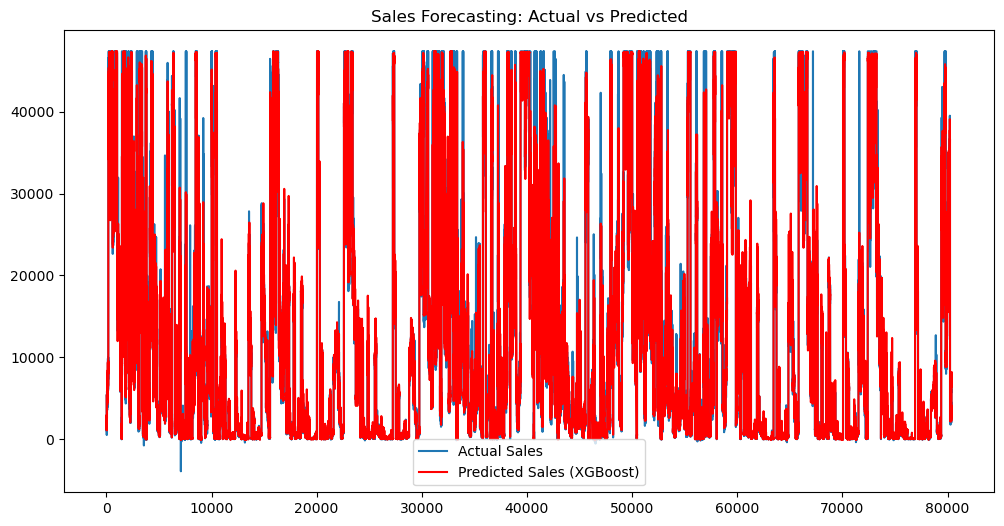

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred_rf, label="Predicted Sales (XGBoost)", color="red")
plt.legend()
plt.title("Sales Forecasting: Actual vs Predicted")
plt.show()

## XGBoost:

In [60]:

xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [61]:
y_pred_xgb = xgb.predict(X_test)

In [62]:
(xgb.score(X_test,y_test)) * 100

98.2394190933859

In [63]:
print("R2 Score:", r2_score(y_test, y_pred_xgb))

R2 Score: 0.982394190933859


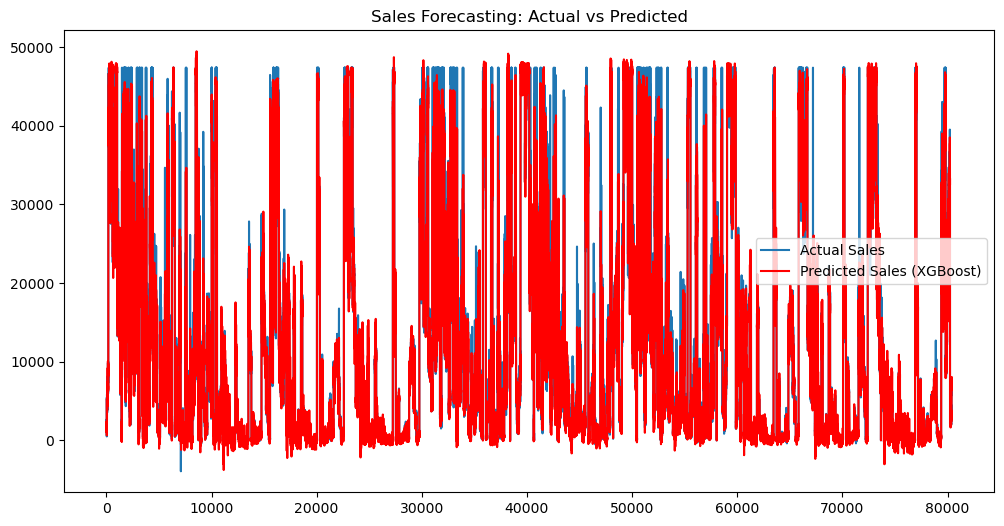

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred_xgb, label="Predicted Sales (XGBoost)", color="red")
plt.legend()
plt.title("Sales Forecasting: Actual vs Predicted")
plt.show()

## Regression Evaluation

In [65]:
def evaluate_regression(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{model_name} -> RMSE: {rmse:.2f}, MAPE: {mape:.4f}")

In [66]:
print("\n--- Regression Model Performance ---")
evaluate_regression("Linear Regression", y_test, y_pred_lr)
evaluate_regression("Random Forest", y_test, y_pred_rf)
evaluate_regression("XGBoost", y_test, y_pred_xgb)


--- Regression Model Performance ---
Linear Regression -> RMSE: 2335.94, MAPE: 76659883991448.7031
Random Forest -> RMSE: 2044.49, MAPE: 67387111858326.0000
XGBoost -> RMSE: 1931.89, MAPE: 84563663989131.4375


## Feature Importance:

In [67]:
# Linear Regression Coefficients
coef_lr = pd.Series(lr.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\nTop Features - Linear Regression:")
print(coef_lr.head(10))


Top Features - Linear Regression:
Lag1            9432.064809
RollingMean3    5202.699880
Month            120.180570
IsHoliday       -113.231001
Fuel_Price        71.826838
Size              65.394234
Lag2              62.856759
Year             -60.842397
Temperature      -26.315749
Store            -24.031984
dtype: float64


In [68]:
# Random Forest Feature Importance
feat_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Features - Random Forest:")
print(feat_rf.head(10))


Top Features - Random Forest:
Lag1            0.931000
RollingMean3    0.041676
Lag2            0.005251
Dept            0.004202
Month           0.003981
Temperature     0.002896
Fuel_Price      0.002296
CPI             0.002082
Unemployment    0.001735
Size            0.001453
dtype: float64


In [69]:
feat_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Features - XGBoost:")
print(feat_xgb.head(10))


Top Features - XGBoost:
Lag1            0.897229
RollingMean3    0.065664
Month           0.007595
IsHoliday       0.006980
Lag2            0.004381
Dept            0.003548
Year            0.003378
Type_C          0.001590
Fuel_Price      0.001529
CPI             0.001497
dtype: float32


## Plot feature importances

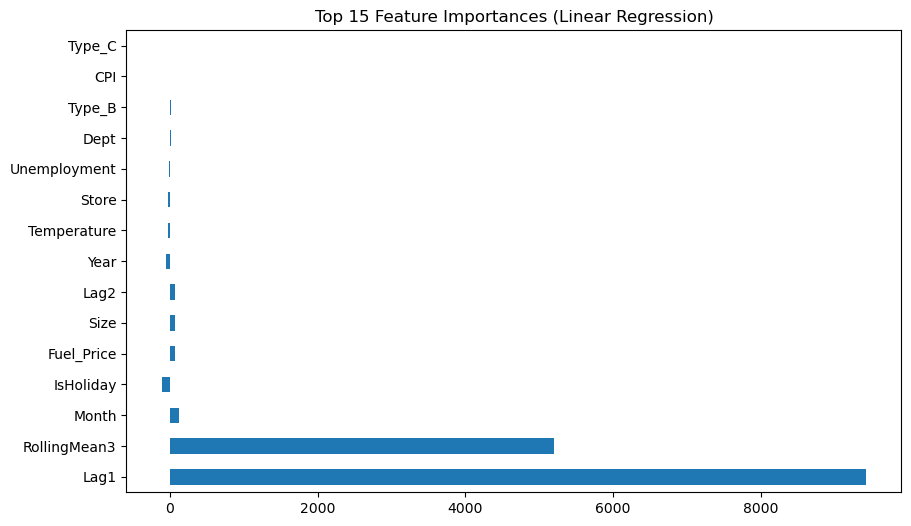

In [70]:
plt.figure(figsize=(10,6))
coef_lr.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (Linear Regression)")
plt.show()

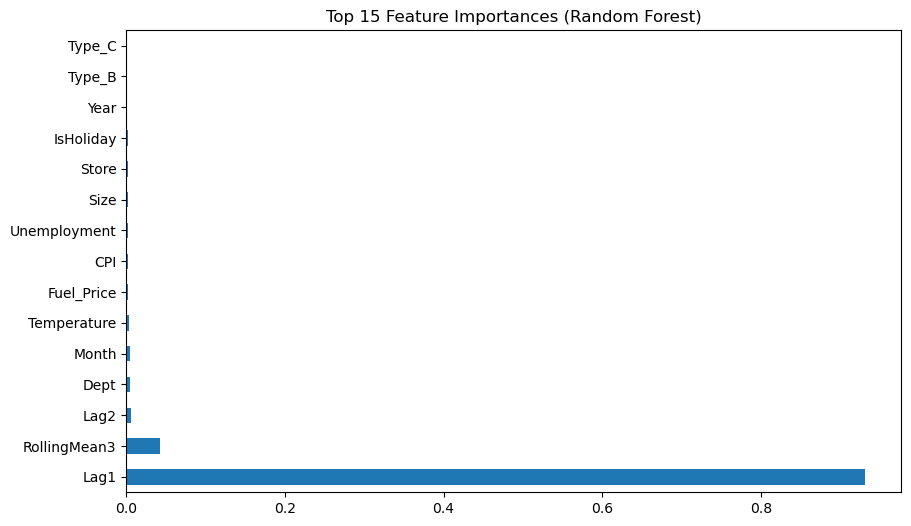

In [71]:
plt.figure(figsize=(10,6))
feat_rf.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()



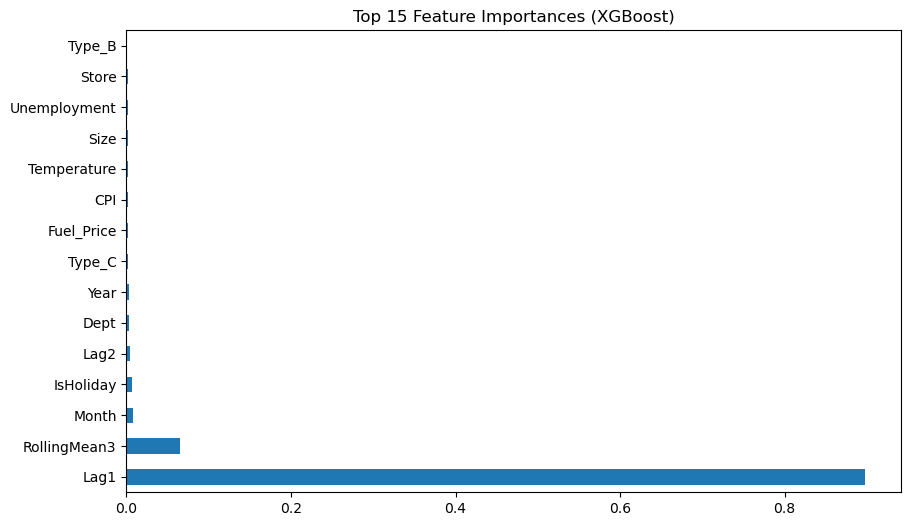

In [72]:
plt.figure(figsize=(10,6))
feat_xgb.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

In [73]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Lag1,Lag2,RollingMean3,Type_B,Type_C
3,1.0,1.0,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315.0,2010.0,2.0,41595.55,46039.49,37519.846667,0.0,0.0
4,1.0,1.0,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315.0,2010.0,3.0,19403.54,41595.55,35679.526667,0.0,0.0
5,1.0,1.0,2010-03-12,21043.39,0,57.79,2.667,211.380643,8.106,151315.0,2010.0,3.0,21827.90,19403.54,27608.996667,0.0,0.0
6,1.0,1.0,2010-03-19,22136.64,0,54.58,2.720,211.215635,8.106,151315.0,2010.0,3.0,21043.39,21827.90,20758.276667,0.0,0.0
7,1.0,1.0,2010-03-26,26229.21,0,51.45,2.732,211.018042,8.106,151315.0,2010.0,3.0,22136.64,21043.39,21669.310000,0.0,0.0


In [74]:
df.dtypes

Store                  float64
Dept                   float64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int32
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Size                   float64
Year                   float64
Month                  float64
Lag1                   float64
Lag2                   float64
RollingMean3           float64
Type_B                 float64
Type_C                 float64
dtype: object